# Facebook_Metrics

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math
import pickle


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                            ConfusionMatrixDisplay,accuracy_score,f1_score,
                            mean_squared_error, mean_absolute_error, max_error,
                            r2_score, explained_variance_score)

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF,WhiteKernel,DotProduct
from sklearn.neural_network import MLPRegressor

## Loading Data

In [227]:
Dataset = pd.read_csv('Regression_Datasets/4_Facebook_Metrics/Facebook_Metrics.csv', delimiter=';') 
Dataset.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Data Prepration And Analysis

In [228]:
print(np.count_nonzero(Dataset==np.nan))
print(np.count_nonzero(Dataset=="?"))
Dataset.isnull().sum()

0
0


Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [239]:

null_vals = Dataset[Dataset.isna().any(axis=1)]
null_vals

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0
120,136393,Photo,1,10,7,9,0.0,584,1029,273,271,308,943,511,232,0,2.0,NaN,2
124,136393,Photo,1,10,7,6,0.0,677,1285,251,246,297,1210,615,211,0,7.0,NaN,7
164,135428,Photo,1,9,5,10,0.0,1060,2004,266,251,337,1705,870,204,0,18.0,NaN,18
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [229]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [231]:
Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Page total likes,500.0,123194.176000,16272.813214,81370.0,112676.00,129600.0,136393.00,139441.0
Category,500.0,1.880000,0.852675,1.0,1.00,2.0,3.00,3.0
Post Month,500.0,7.038000,3.307936,1.0,4.00,7.0,10.00,12.0
Post Weekday,500.0,4.150000,2.030701,1.0,2.00,4.0,6.00,7.0
Post Hour,500.0,7.840000,4.368589,1.0,3.00,9.0,11.00,23.0
Paid,499.0,0.278557,0.448739,0.0,0.00,0.0,1.00,1.0
Lifetime Post Total Reach,500.0,13903.360000,22740.787890,238.0,3315.00,5281.0,13168.00,180480.0
Lifetime Post Total Impressions,500.0,29585.948000,76803.246670,570.0,5694.75,9051.0,22085.50,1110282.0
Lifetime Engaged Users,500.0,920.344000,985.016636,9.0,393.75,625.5,1062.00,11452.0
Lifetime Post Consumers,500.0,798.772000,882.505013,9.0,332.50,551.5,955.50,11328.0


In [232]:
Dataset.apply(lambda x: len(x.unique()))

Page total likes                                                        90
Type                                                                     4
Category                                                                 3
Post Month                                                              12
Post Weekday                                                             7
Post Hour                                                               22
Paid                                                                     3
Lifetime Post Total Reach                                              485
Lifetime Post Total Impressions                                        494
Lifetime Engaged Users                                                 414
Lifetime Post Consumers                                                422
Lifetime Post Consumptions                                             440
Lifetime Post Impressions by people who have liked your Page           491
Lifetime Post reach by pe

<AxesSubplot:>

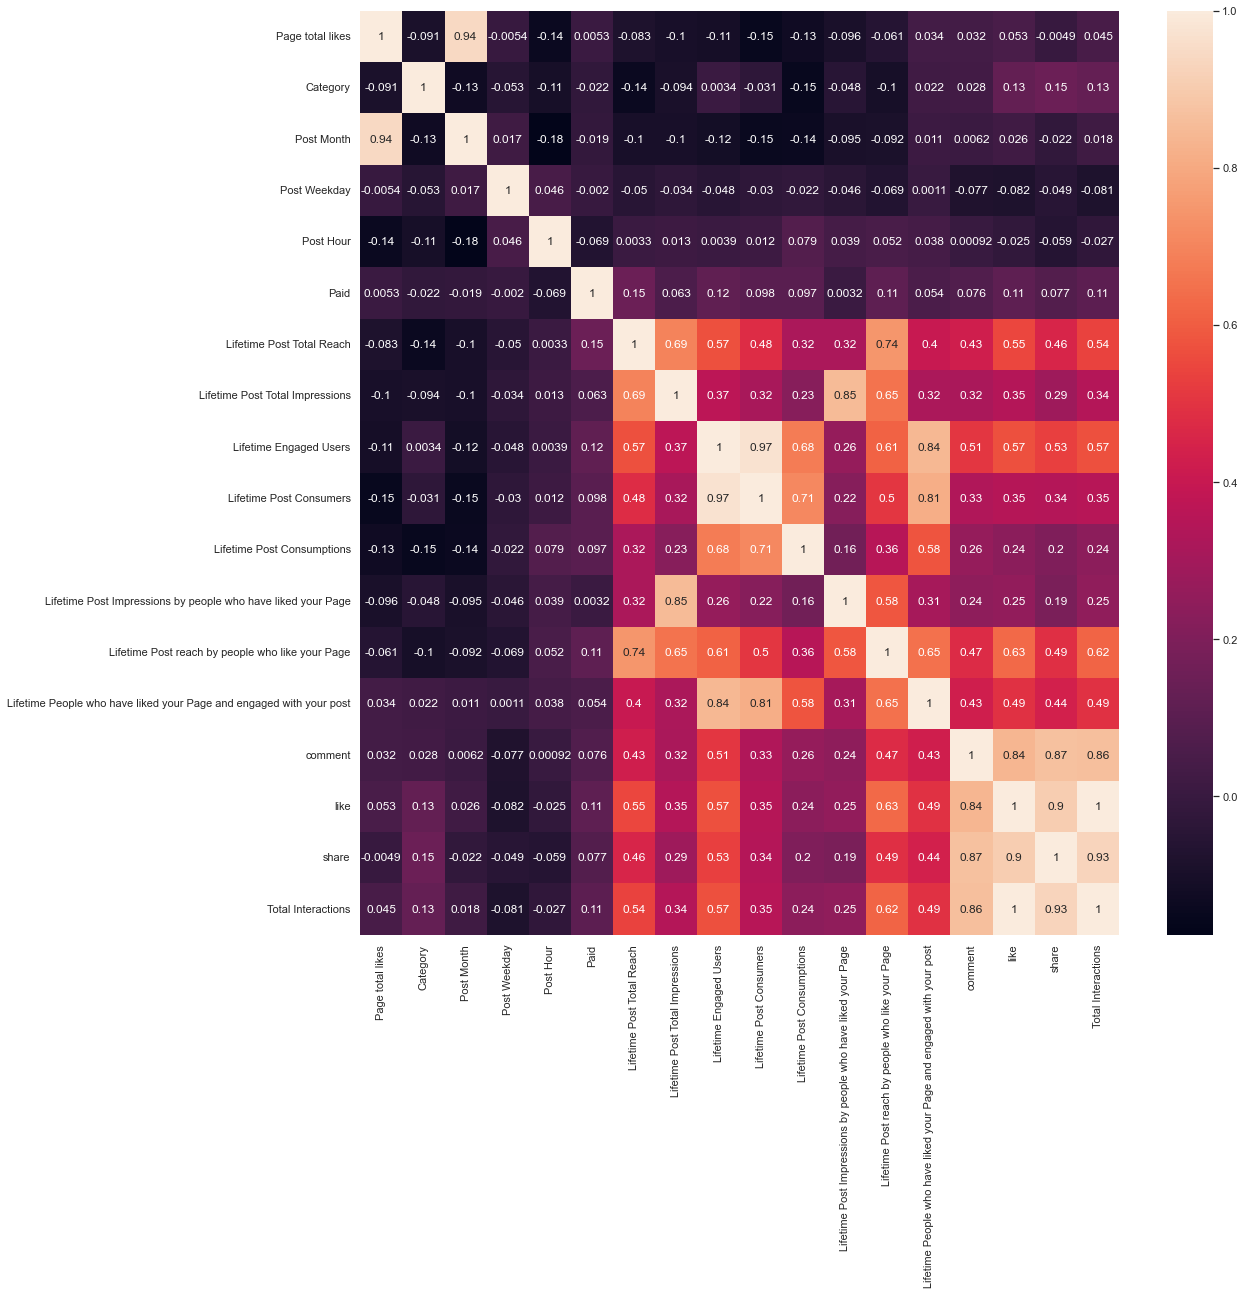

In [233]:
plt.figure(figsize=(17,17))
sns.heatmap(Dataset.corr(), annot =True )

In [235]:
Dataset.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

<AxesSubplot:>

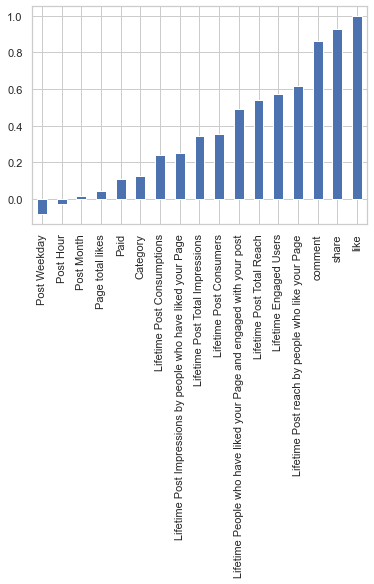

In [236]:
cor = Dataset.corr()['Total Interactions'][:-1].sort_values()
cor.plot(kind="bar")

75     6
39     6
0      6
67     5
90     5
      ..
263    1
818    1
133    1
490    1
257    1
Name: Total Interactions, Length: 280, dtype: int64
---------------------------


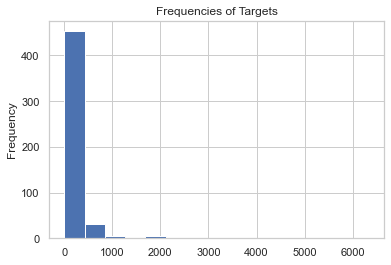

In [240]:
frequency = Dataset['Total Interactions'].value_counts()
print(frequency)
print("---------------------------")
plt.title('Frequencies of Targets')
Dataset['Total Interactions'].plot.hist(subplots=True, figsize=(20, 30), bins=15);

In [241]:
Dataset["Type"].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

### Defining Dictionary Of Models

In [209]:
# MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r', 'knn_r', 'adaboost_r', 'gaussian_process_r', 'neural_network_r'}
MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r','knn_r', "adaboost_r", "GaussianProcessRegressor", "nn_r"}
facebook_metrics_dict = {}

## Train and Test set

In [242]:
print(df.shape)
string_values = Dataset["Type"]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(string_values)
Dataset["Type"] = integer_encoded
Dataset = df.dropna()

X = Dataset.iloc[:,:-1]
y = Dataset.iloc[:, -1:]

(495, 19)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [10]:
StScale = StandardScaler()
StScale.fit(X_train)
X_train = StScale.transform(X_train)

X_test = StScale.transform(X_test)

In [210]:
from tabulate import tabulate
def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    
    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])
    
    linear_r_predict = curr_model.predict(X_test)
    
    rmse = np.sqrt( mean_squared_error(y_test, linear_r_predict))
    model['rmse'] = rmse
    mse = mean_squared_error(y_test, linear_r_predict)
    model['mse'] = mse
    r2 = r2_score(y_test, linear_r_predict)
    model['r2'] = r2
    
    linear_r_predict_trn = curr_model.predict(X_train)
    mse_trn = mean_squared_error(y_train, linear_r_predict_trn)
    model['mse_trn'] = mse_trn
    r2_trn = r2_score(y_train, linear_r_predict_trn)
    model['r2_trn'] = r2_trn
    
    table.append(['Root Mean Squarred Error', rmse])
    table.append(['Mean Squarred Error', mse])
    table.append(['r2 Score ',r2])
    table.append(['Mean Squarred Error (train)', mse_trn])
    table.append(['r2 Score (train)',r2_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

## Linear Regression

In [211]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

## Linear Regression Analysis

In [212]:
facebook_metrics_dict['linear_r'] = {'model':linear_r, 'hyperparameters':0}
model_results(facebook_metrics_dict['linear_r'])

+-----------------------------+-------------+
| Parameters / Metrics        |       Tuned |
+=============================+=============+
| Root Mean Squarred Error    | 1.26312e-12 |
+-----------------------------+-------------+
| Mean Squarred Error         | 1.59547e-24 |
+-----------------------------+-------------+
| r2 Score                    | 1           |
+-----------------------------+-------------+
| Mean Squarred Error (train) | 1.62785e-25 |
+-----------------------------+-------------+
| r2 Score (train)            | 1           |
+-----------------------------+-------------+


## Support Vector Regression

In [14]:
svr = SVR(kernel='linear').fit(X_train, y_train)

In [15]:
parameters = {
        'C': scipy.stats.uniform(1, 1000), 
        'gamma': scipy.stats.uniform(0.01, 1000)
}
svr_model = RandomizedSearchCV(svr, parameters, verbose=1, n_iter=50, random_state=0).fit(X_train, y_train)
svr_model.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'C': 549.8135039273247, 'gamma': 715.1993663724195}

In [16]:
svr_model.best_estimator_

SVR(C=549.8135039273247, gamma=715.1993663724195, kernel='linear')

## Support Vector Regression Analysis

In [213]:
facebook_metrics_dict['svr'] = {'model':svr_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['svr'])

+-----------------------------+--------------+
| Parameters / Metrics        |        Tuned |
+=============================+==============+
| C                           | 549.814      |
+-----------------------------+--------------+
| gamma                       | 715.199      |
+-----------------------------+--------------+
| Root Mean Squarred Error    |   0.170791   |
+-----------------------------+--------------+
| Mean Squarred Error         |   0.0291696  |
+-----------------------------+--------------+
| r2 Score                    |   1          |
+-----------------------------+--------------+
| Mean Squarred Error (train) |   0.00212006 |
+-----------------------------+--------------+
| r2 Score (train)            |   1          |
+-----------------------------+--------------+


## Decision Tree Regression

In [18]:
tree = DecisionTreeRegressor(max_features='auto').fit(X_train, y_train)

In [19]:
parameters = {
#     'max_depth': scipy.stats.uniform(1, 1000),
    'min_samples_leaf': scipy.stats.uniform(0, 0.5)
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=100, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'min_samples_leaf': 0.01010919872016286}

## Decision tree Analysis

In [214]:
facebook_metrics_dict['decision_tree_r'] = {'model':tree_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['decision_tree_r'])

+-----------------------------+----------------+
| Parameters / Metrics        |          Tuned |
+=============================+================+
| min_samples_leaf            |      0.0101092 |
+-----------------------------+----------------+
| Root Mean Squarred Error    |    523.287     |
+-----------------------------+----------------+
| Mean Squarred Error         | 273829         |
+-----------------------------+----------------+
| r2 Score                    |      0.477918  |
+-----------------------------+----------------+
| Mean Squarred Error (train) |   1409.11      |
+-----------------------------+----------------+
| r2 Score (train)            |      0.981744  |
+-----------------------------+----------------+


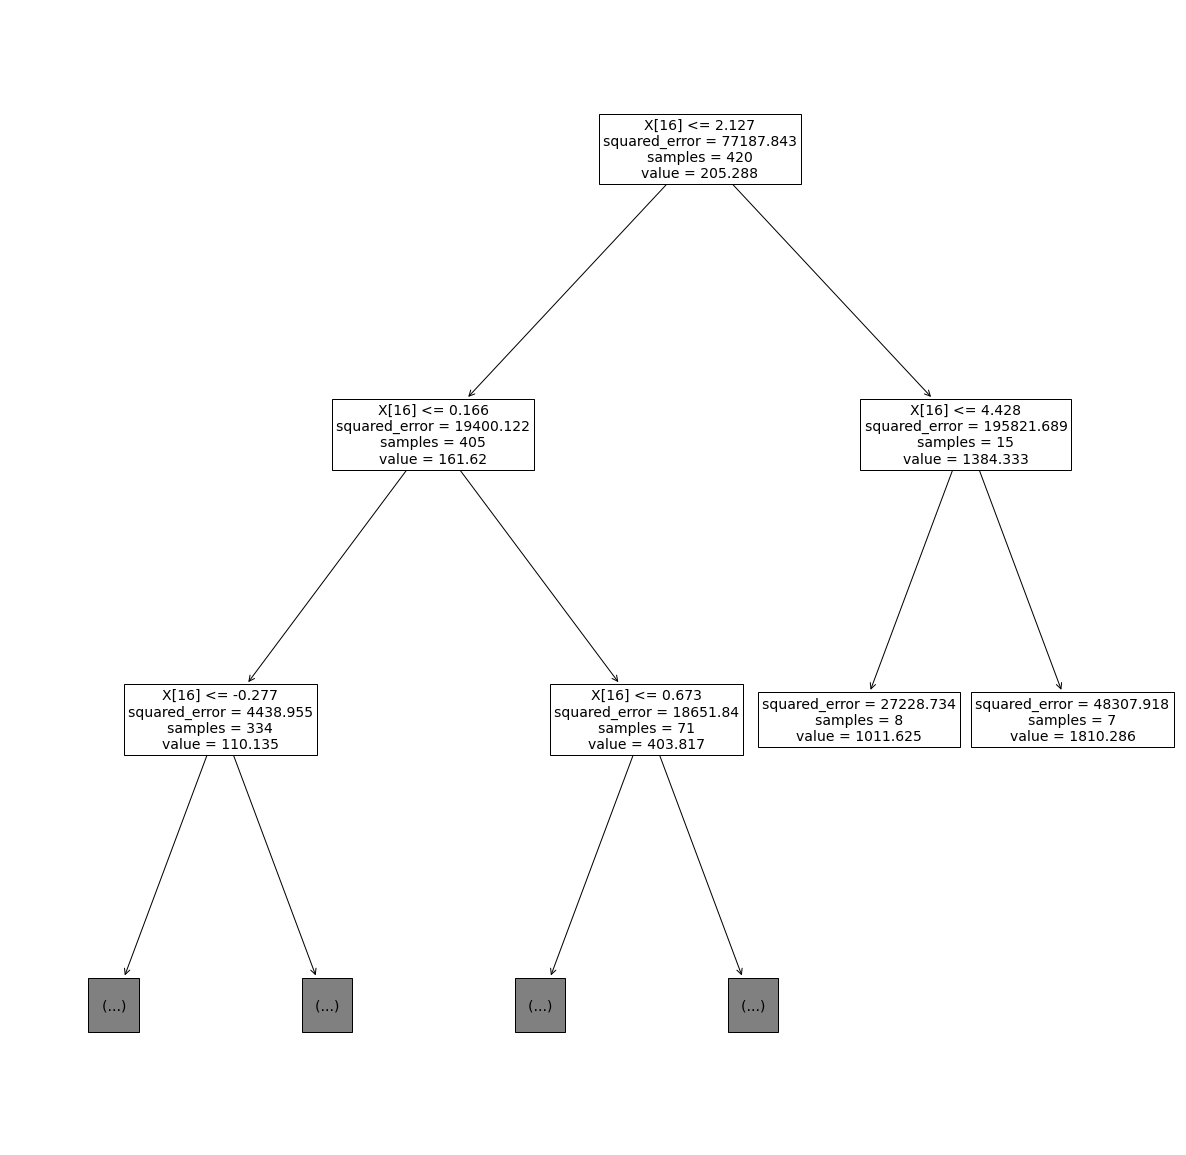

In [21]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest Regression

In [22]:
forest = RandomForestRegressor(max_features='auto').fit(X_train, y_train)

In [23]:
parameters = {
    'n_estimators': range(1,100),
    'max_depth': scipy.stats.uniform(1, 100),
#     'min_samples_leaf': 0.02,
}
forest_model = RandomizedSearchCV(forest, parameters, verbose=1, n_iter=50, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'max_depth': 40.278479610082975, 'n_estimators': 26}

## Random Forest Analysis

In [216]:
facebook_metrics_dict['random_forest_r'] = {'model':forest_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['random_forest_r'])

+-----------------------------+---------------+
| Parameters / Metrics        |         Tuned |
+=============================+===============+
| max_depth                   |     40.2785   |
+-----------------------------+---------------+
| n_estimators                |     26        |
+-----------------------------+---------------+
| Root Mean Squarred Error    |    511.209    |
+-----------------------------+---------------+
| Mean Squarred Error         | 261335        |
+-----------------------------+---------------+
| r2 Score                    |      0.501739 |
+-----------------------------+---------------+
| Mean Squarred Error (train) |    165.39     |
+-----------------------------+---------------+
| r2 Score (train)            |      0.997857 |
+-----------------------------+---------------+


## K Nearest Neighbours Regression

In [25]:
knn =  KNeighborsRegressor()

In [26]:
parameters = {
    'n_neighbors': range(1, 100), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'weights': ['uniform', 'distance'], 
    'leaf_size': scipy.stats.uniform(1, 50)
}
knn_model = RandomizedSearchCV(knn, parameters,verbose=1,random_state=0,n_iter=100, cv =10).fit(X_train, y_train)
knn_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'algorithm': 'kd_tree',
 'leaf_size': 37.10277997351739,
 'n_neighbors': 4,
 'weights': 'distance'}

### KNN Analysis

In [217]:
facebook_metrics_dict['knn_r'] = {'model':knn_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['knn_r'])

+-----------------------------+---------------------+
| Parameters / Metrics        | Tuned               |
+=============================+=====================+
| algorithm                   | kd_tree             |
+-----------------------------+---------------------+
| leaf_size                   | 37.10277997351739   |
+-----------------------------+---------------------+
| n_neighbors                 | 4                   |
+-----------------------------+---------------------+
| weights                     | distance            |
+-----------------------------+---------------------+
| Root Mean Squarred Error    | 517.871903029086    |
+-----------------------------+---------------------+
| Mean Squarred Error         | 268191.30794696696  |
+-----------------------------+---------------------+
| r2 Score                    | 0.48866656392822694 |
+-----------------------------+---------------------+
| Mean Squarred Error (train) | 0.0                 |
+---------------------------

## Adaboost

In [50]:
AdaBoost = AdaBoostRegressor()

In [51]:
AdaBoost.fit(X_train,y_train)

AdaBoostRegressor()

In [52]:
param_distribution = {'learning_rate':scipy.stats.uniform(0.01,5),
                'n_estimators': range(1,250),
                'loss' : ['linear', 'square', 'exponential']}

In [53]:
adaBoost_model = RandomizedSearchCV(AdaBoost,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5, n_iter=100).fit(X_train,y_train)


adaBoost_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'learning_rate': 1.1637116770339784, 'loss': 'square', 'n_estimators': 86}

### Adaboost Analysis

In [218]:
facebook_metrics_dict['adaboost_r'] = {'model':adaBoost_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['adaboost_r'])

+-----------------------------+--------------------+
| Parameters / Metrics        | Tuned              |
+=============================+====================+
| learning_rate               | 1.1637116770339784 |
+-----------------------------+--------------------+
| loss                        | square             |
+-----------------------------+--------------------+
| n_estimators                | 86                 |
+-----------------------------+--------------------+
| Root Mean Squarred Error    | 499.2861933793185  |
+-----------------------------+--------------------+
| Mean Squarred Error         | 249286.70289921024 |
+-----------------------------+--------------------+
| r2 Score                    | 0.524710076041456  |
+-----------------------------+--------------------+
| Mean Squarred Error (train) | 774.1319941768083  |
+-----------------------------+--------------------+
| r2 Score (train)            | 0.9899708041814937 |
+-----------------------------+---------------

## GaussianProcessRegressor

In [174]:
GPR = GaussianProcessRegressor(kernel = 1.0 * RBF(1.0) ,normalize_y = True, alpha=(1e-10,))

In [175]:
param_distribution = { "alpha":scipy.stats.reciprocal(1e-11, 1e-8)}



In [176]:
GPR_model = RandomizedSearchCV(GPR, param_distribution, cv=3, n_iter=15 ,random_state=0,verbose=1)
GPR_model.fit(X_train, y_train)
GPR_model.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs

{'alpha': 6.431172050131991e-10}

### GaussianProcessRegressor analysis

In [219]:
facebook_metrics_dict['GaussianProcessRegressor'] = {'model':GPR_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['GaussianProcessRegressor'])

+-----------------------------+----------------+
| Parameters / Metrics        |          Tuned |
+=============================+================+
| alpha                       |    6.43117e-10 |
+-----------------------------+----------------+
| Root Mean Squarred Error    |   73.4227      |
+-----------------------------+----------------+
| Mean Squarred Error         | 5390.9         |
+-----------------------------+----------------+
| r2 Score                    |    0.989722    |
+-----------------------------+----------------+
| Mean Squarred Error (train) |    6.62958e-06 |
+-----------------------------+----------------+
| r2 Score (train)            |    1           |
+-----------------------------+----------------+


## neural_network_regression (MLPRegressor)

In [172]:
nn_r = MLPRegressor()

In [38]:
param_distribution ={'max_iter': range(1000, 1500),
                     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                     'learning_rate':['constant', 'invscaling', 'adaptive'],
                     'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                    'solver':["adam",'sgd'],
                    'activation':["identity",'tanh', "relu", "logistic"]   
}

In [39]:
nnr_model = RandomizedSearchCV(nn_r,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5, n_iter=100).fit(X_train,y_train)


nnr_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1211) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passth

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1211) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1099) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1099) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1099) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1099) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1244) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1356) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1356) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1356) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1356) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1279) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1058) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maxi

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1280) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1368) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1368) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1368) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1368) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1438) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1297) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1259) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1259) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1341) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1341) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1373) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1414) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1094) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1094) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1094) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Asus\anaconda3\lib\site-

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1347) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1022) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1274) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1304) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1304) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1304) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1433) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1148) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1020) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1020) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1020) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1020) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1314) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1135) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1135) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1343) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1343) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1343) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1343) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1394) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py", line 701, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_

{'activation': 'identity',
 'alpha': 0.00020078860649810326,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'invscaling',
 'max_iter': 1190,
 'solver': 'adam'}

### neural_network_regression analysis

In [220]:
facebook_metrics_dict['nn_r'] = {'model':nnr_model, 'hyperparameters':1}
model_results(facebook_metrics_dict['nn_r'])

+-----------------------------+------------------------+
| Parameters / Metrics        | Tuned                  |
+=============================+========================+
| activation                  | identity               |
+-----------------------------+------------------------+
| alpha                       | 0.00020078860649810326 |
+-----------------------------+------------------------+
| hidden_layer_sizes          | (50, 50, 50)           |
+-----------------------------+------------------------+
| learning_rate               | invscaling             |
+-----------------------------+------------------------+
| max_iter                    | 1190                   |
+-----------------------------+------------------------+
| solver                      | adam                   |
+-----------------------------+------------------------+
| Root Mean Squarred Error    | 3.9448897320572636     |
+-----------------------------+------------------------+
| Mean Squarred Error         |

----------------

### Analyzing Models for Red Wine Quality

+--------------------------+------------------+------------+----------------+--------------------+---------------+
| Model Name               |              MSE |   r2 Score |    MSE (train) |   r2 Score (train) |          RMSE |
+==========================+==================+============+================+====================+===============+
| adaboost_r               | 249287           |   0.52471  |  774.132       |           0.989971 | 499.286       |
+--------------------------+------------------+------------+----------------+--------------------+---------------+
| random_forest_r          | 261335           |   0.501739 |  165.39        |           0.997857 | 511.209       |
+--------------------------+------------------+------------+----------------+--------------------+---------------+
| linear_r                 |      1.59547e-24 |   1        |    1.62785e-25 |           1        |   1.26312e-12 |
+--------------------------+------------------+------------+----------------+---

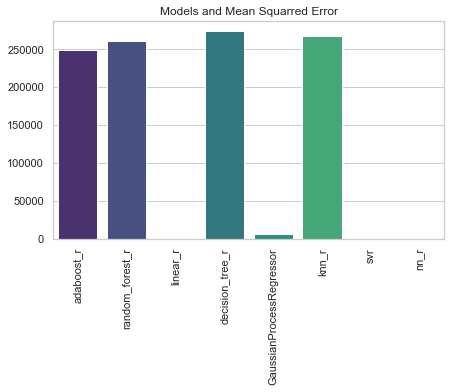

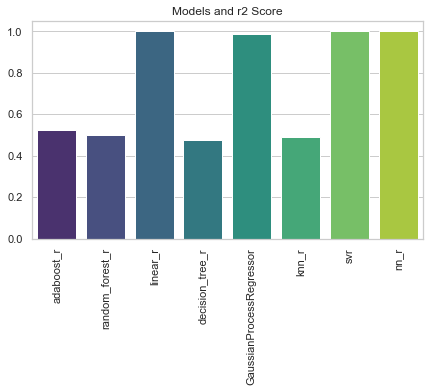

In [243]:
def cross_checking_model_results(dictionary):
    table = [["Model Name", "MSE", "r2 Score","MSE (train)", "r2 Score (train)" , "RMSE"]]
    x_models = []
    y_mse = []
    y_r2 = []
    y_mse_trn = []
    y_r2_trn = []
    y_rmse = []
    
    for model_key in MODELS:
        table.append([model_key, dictionary[model_key]['mse'], dictionary[model_key]['r2'],
                                 dictionary[model_key]['mse_trn'], dictionary[model_key]['r2_trn'],
                                                         dictionary[model_key]['rmse']            ])
        x_models.append(model_key)
        y_mse.append(dictionary[model_key]['mse'])
        y_r2.append(dictionary[model_key]['r2'])
        y_mse_trn.append(dictionary[model_key]['mse_trn'])
        y_r2_trn.append(dictionary[model_key]['r2_trn'])
        y_rmse.append(dictionary[model_key]['rmse'])
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_mse, palette="viridis")
    ax1.set_title('Models and Mean Squarred Error')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_r2, palette="viridis")
    ax2.set_title('Models and r2 Score')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(facebook_metrics_dict)

### Regression Dictionary
Exporting Model Data for Later Analysis and Comparison

In [223]:
with open('base_regression_dict.dictionary', 'rb') as config_dictionary_file:
    base_regression_dict = pickle.load(config_dictionary_file)

base_regression_dict['facebook_metrics']= facebook_metrics_dict

with open('base_regression_dict.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(base_regression_dict, config_dictionary_file)